In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

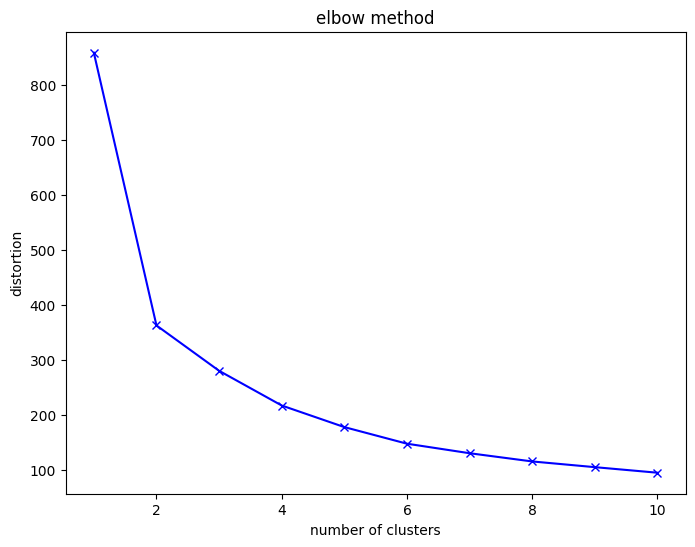

In [5]:
data_2d = pd.read_csv('data_2d.csv')
mnist = pd.read_csv('mnist.csv')

def elbow_method(data, max_k = 10):
  distortions = []
  K = range(1, max_k + 1)
  for k in K:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(data)
    distortions.append(kmeans.inertia_)
  plt.figure(figsize = (8, 6))
  plt.plot(K, distortions, "bx-")
  plt.xlabel('number of clusters')
  plt.ylabel('distortion')
  plt.title('elbow method')
  plt.show()

elbow_method(data_2d)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


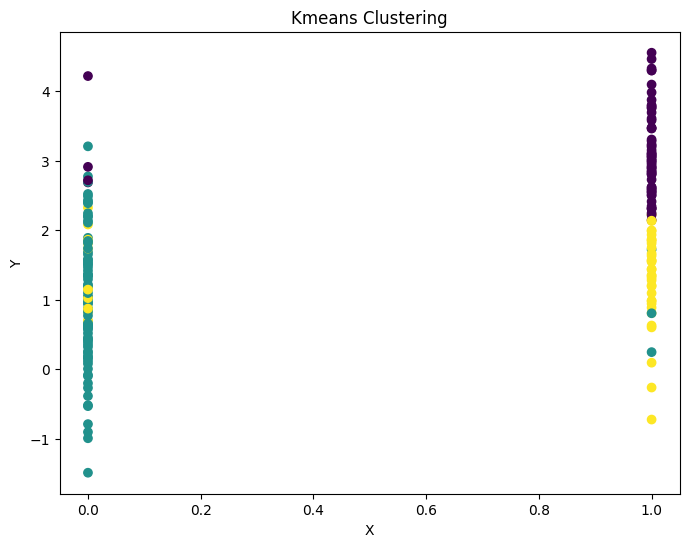

In [6]:
optimal_k_2d = 3
kmeans_2d = KMeans(n_clusters = optimal_k_2d)
data_2d['Cluster'] = kmeans_2d.fit_predict(data_2d)

plt.figure(figsize = (8, 6))
plt.scatter(data_2d.iloc[:, 0], data_2d.iloc[:, 1], c=data_2d['Cluster'], cmap='viridis')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Kmeans Clustering')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

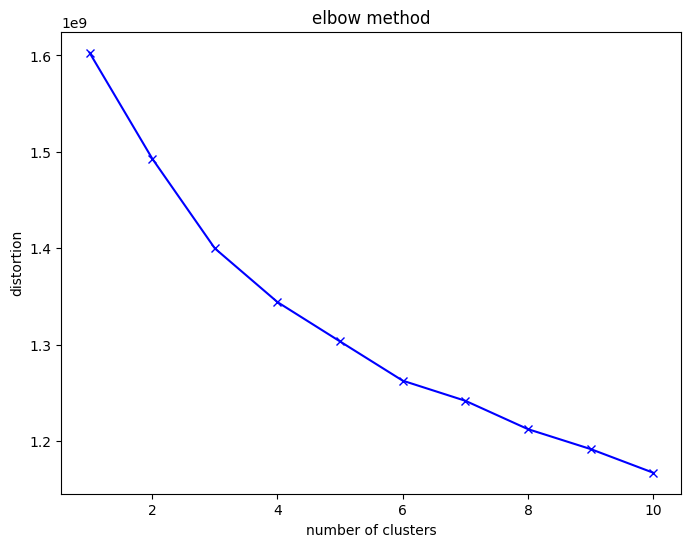

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


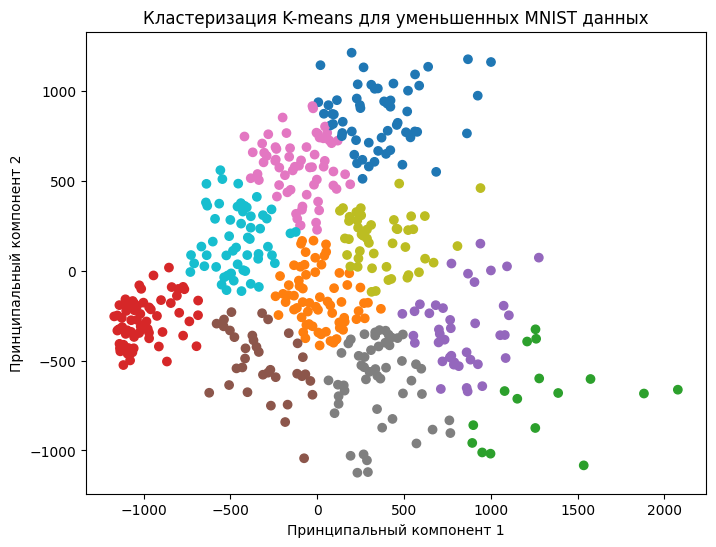

In [11]:
mnist_features = mnist.drop(columns=['7'])
elbow_method(mnist_features)

pca = PCA(n_components=2)
mnist_reduced = pca.fit_transform(mnist_features)

optimal_k_mnist = 10
kmeans_mnist = KMeans(n_clusters=optimal_k_mnist)
mnist_clusters = kmeans_mnist.fit_predict(mnist_reduced)

plt.figure(figsize=(8, 6))
plt.scatter(mnist_reduced[:, 0], mnist_reduced[:, 1], c=mnist_clusters, cmap='tab10')
plt.xlabel('Принципальный компонент 1')
plt.ylabel('Принципальный компонент 2')
plt.title('Кластеризация K-means для уменьшенных MNIST данных')
plt.show()